In [2]:
#### Importing of labrarary----

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data= pd.read_csv('Car_Sales..csv')

In [4]:
data.head()

,Make,Colour,Odometer (KM),Doors,Doors.1
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [5]:
data.shape

(10, 5)

In [6]:
data.columns
data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Doors.1           int64
dtype: object

In [7]:
data.Make.unique()

array(['Toyota', 'Honda', 'BMW', 'Nissan'], dtype=object)

In [8]:
df = data[['Doors','Doors.1']]
df.head(2)

,Doors,Doors.1
0,4,4000
1,4,5000


# Linear Regression

In [9]:
### Sampling of data....
training,testing = train_test_split(df,test_size= 0.2)

In [10]:
training.shape

(8, 2)

In [11]:
testing.shape

(2, 2)

In [12]:
import numpy as np

In [13]:
### Defining....
X = training['Doors']
y = training ['Doors.1']

In [15]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [16]:
##### Linear Regression its take array like shape with one dimenstion only
from sklearn.linear_model import LinearRegression

In [17]:
##### We have to create a object of this Linear Regression model
model = LinearRegression()      ### y = mx + b
print(model)

LinearRegression()


In [18]:
train_model = model.fit(X,y)
print("Model training is Done")
print(train_model)

Model training is Done
LinearRegression()


In [19]:
print(model.coef_)       #### this is m value

[[7500.]]


In [20]:
print(model.intercept_)     #### this is y value y = mx + b

[-21662.5]


In [21]:
#### Equation after training model
X1 = 4
y = 15721.42857143*X1 + -56607.14285714
print("The car sales {} is {}".format(X1,y))

The car sales 4 is 6278.571428579999


In [22]:
#### for validation we are passing only x and it is predicting y 
X_test = testing['Doors'].values.reshape(-1,1)
X_test

array([[4],
       [4]], dtype=int64)

In [23]:
pred_Doors = train_model.predict(X_test)
pred_Doors

array([[8337.5],
       [8337.5]])

In [24]:
testing['pred_Doors'] = pred_Doors

In [25]:
testing['Error'] = testing['Doors'] - testing ['pred_Doors']       ##### actual - predicated
testing

,Doors,Doors.1,pred_Doors,Error
4,4,3500,8337.5,-8333.5
8,4,6250,8337.5,-8333.5


<Axes: xlabel='Doors.1', ylabel='pred_Doors'>

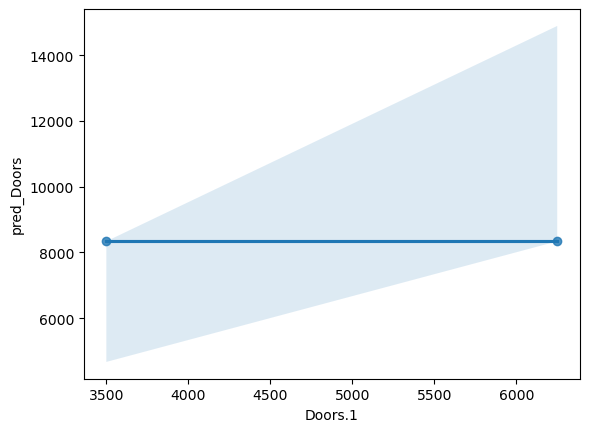

In [26]:
sns.regplot(x = 'Doors.1', y = 'pred_Doors',data = testing)

<Axes: xlabel='Doors.1', ylabel='Doors'>

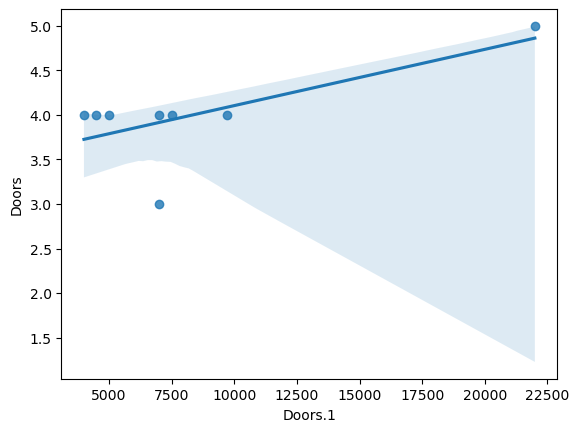

In [27]:
sns.regplot(x = 'Doors.1', y = 'Doors',data = training)

In [28]:
##### Pre - prossing stage----

In [29]:
#### Data duplicated-----
data.duplicated().sum()

0

In [30]:
#### Mising value---
data.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Doors.1          0
dtype: int64

In [31]:
sns.set_style('darkgrid')

<Axes: >

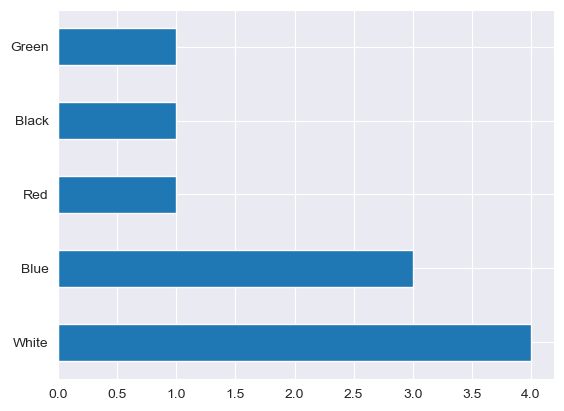

In [32]:
data['Colour']. value_counts().head(5).plot(kind = 'barh')

In [33]:
##### Changing Coloumn name ----
data.rename(columns = {'Make': 'Car name','Odometer (KM)':'kilometer'}, inplace = 'true')

In [34]:
data

,Car name,Colour,kilometer,Doors,Doors.1
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [38]:
data.Colour.value_counts()

White    4
Blue     3
Red      1
Black    1
Green    1
Name: Colour, dtype: int64

In [39]:
### Filter the data based on Colour 
Blue = data[data['Colour']=='Blue']
Blue.head(2)

,Car name,Colour,kilometer,Doors,Doors.1
2,Toyota,Blue,32549,3,7000
6,Honda,Blue,45698,4,7500


In [43]:
print(Blue.kilometer.unique())
print(Blue.Doors.unique())

[32549 45698 54738]
[3 4]


In [46]:
Blue.Doors.var()

0.33333333333333337

C:\Users\Aishwarya21\AppData\Local\Temp\ipykernel_28980\1008687435.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Blue.corr(),annot= True,cmap = 'RdBu')


<Axes: >

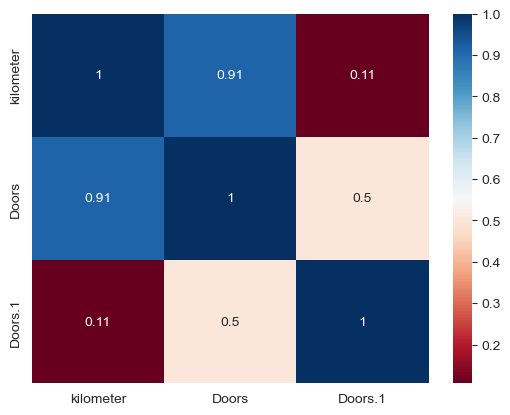

In [50]:
sns.heatmap(Blue.corr(),annot= True,cmap = 'RdBu')

In [52]:
Blue.corr()['Doors.1']> 0.4

C:\Users\Aishwarya21\AppData\Local\Temp\ipykernel_28980\1667907334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Blue.corr()['Doors.1']> 0.4


kilometer    False
Doors         True
Doors.1       True
Name: Doors.1, dtype: bool

In [54]:
Blue[['Doors','kilometer','Car name','Doors.1']]

,Doors,kilometer,Car name,Doors.1
2,3,32549,Toyota,7000
6,4,45698,Honda,7500
7,4,54738,Honda,7000


 Here, according to the data ,we see that linear regression,preprosining data,filter the data to use to predict the data,this is the Car sales data and showing the data pssible for algoritham. 

# Thank you for reviewing!